In [12]:
import csv
import matplotlib.pyplot as plt
import math
import datetime

In [13]:
description = {
    0:'0 rest',
    1:'1 job',
    2:'2 sleep',
    3:'3 repair',
    4:'4 hobby',
    5:'5 lunch',
    6:'6 family',
    7:'7 research',
    8:'8 potato',
    9:'9 fitness',
    10:'10 cleaning',
    11:'11 maintance',
}
summary = {item:0 for item in description.values()}

In [14]:
with open("data/2020.08.19.txt") as fp:
    reader = csv.reader(fp, delimiter=";", quotechar='\n')
    data_read = [ [int(val) for val in row]  for row in reader]

In [15]:
pre = 0
cycle_addiction = 65535;
cycle_step = 0;
for i in range(len(data_read)):
    if (i>0):
        if data_read[i][0]<data_read[i-1][0]:
            cycle_step+=1
        job = description[data_read[i-1][1]]        
        time_spent = data_read[i][0]+cycle_step*cycle_addiction-pre
        if time_spent>2:
            summary[job]+=time_spent
    pre = data_read[i][0]+cycle_step*cycle_addiction

In [16]:
empty_found = True
while empty_found:
    empty_found = False
    for rec in summary.keys():
        if summary[rec]==0:
            empty_found = True
            break
    if empty_found:
        summary.pop(rec)

In [17]:
labels = list(summary.keys())
values = list(summary.values())

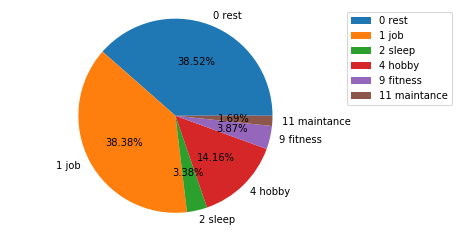

In [18]:
fig1, ax1 = plt.subplots()
 
wedges, texts, autotexts = ax1.pie(values, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

In [19]:
time_sum=sum([item[1] for item in summary.items()])
this_time = datetime.datetime.now()
print('Start time:',this_time-datetime.timedelta(seconds=time_sum))
for item in summary.items():    
    print(item[0],round(item[1]/60/60,1),'h')
print('End time:',this_time)

Start time: 2020-08-18 07:43:43.179178
0 rest 9.1 h
1 job 9.1 h
2 sleep 0.8 h
4 hobby 3.4 h
9 fitness 0.9 h
11 maintance 0.4 h
End time: 2020-08-19 07:23:42.179178
